In [9]:
# importing needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score
# Import bagged classifier
from sklearn.ensemble import BaggingClassifier
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import gradient booster classifier
from sklearn.ensemble import GradientBoostingClassifier

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [10]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [13]:
# Accessing the null values in the dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [14]:
# Dropping all rows with missing values
titanic_temp = titanic_df.dropna()

In [15]:
titanic_temp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [16]:
titanic_temp["Sex"].unique()


array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [17]:
titanic_temp = pd.get_dummies(titanic_temp, prefix="Sex", columns=["Sex"])
# # Drop rows with missing values
# titanic_df.dropna()
titanic_temp.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [18]:
titanic_temp = pd.get_dummies(titanic_temp, prefix="Embarked", columns=["Embarked"])
titanic_temp.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,True,False,False,True


## Creating a Decision Tree

In [20]:
# Select relevant varaibles

titanic_temp = titanic_temp[['Survived', 'Pclass', 'Age', 'Sex_female', 'Sex_male',
                             'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Split data into features and target
X = titanic_temp.drop('Survived', axis=1)
y = titanic_temp['Survived']

## Split the data.

In [21]:
# Split the data into a training, development, and test set
# The data is split into 60% training, 20% development, 20% test

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=42)

### Train a Decision Tree and make a plot of it

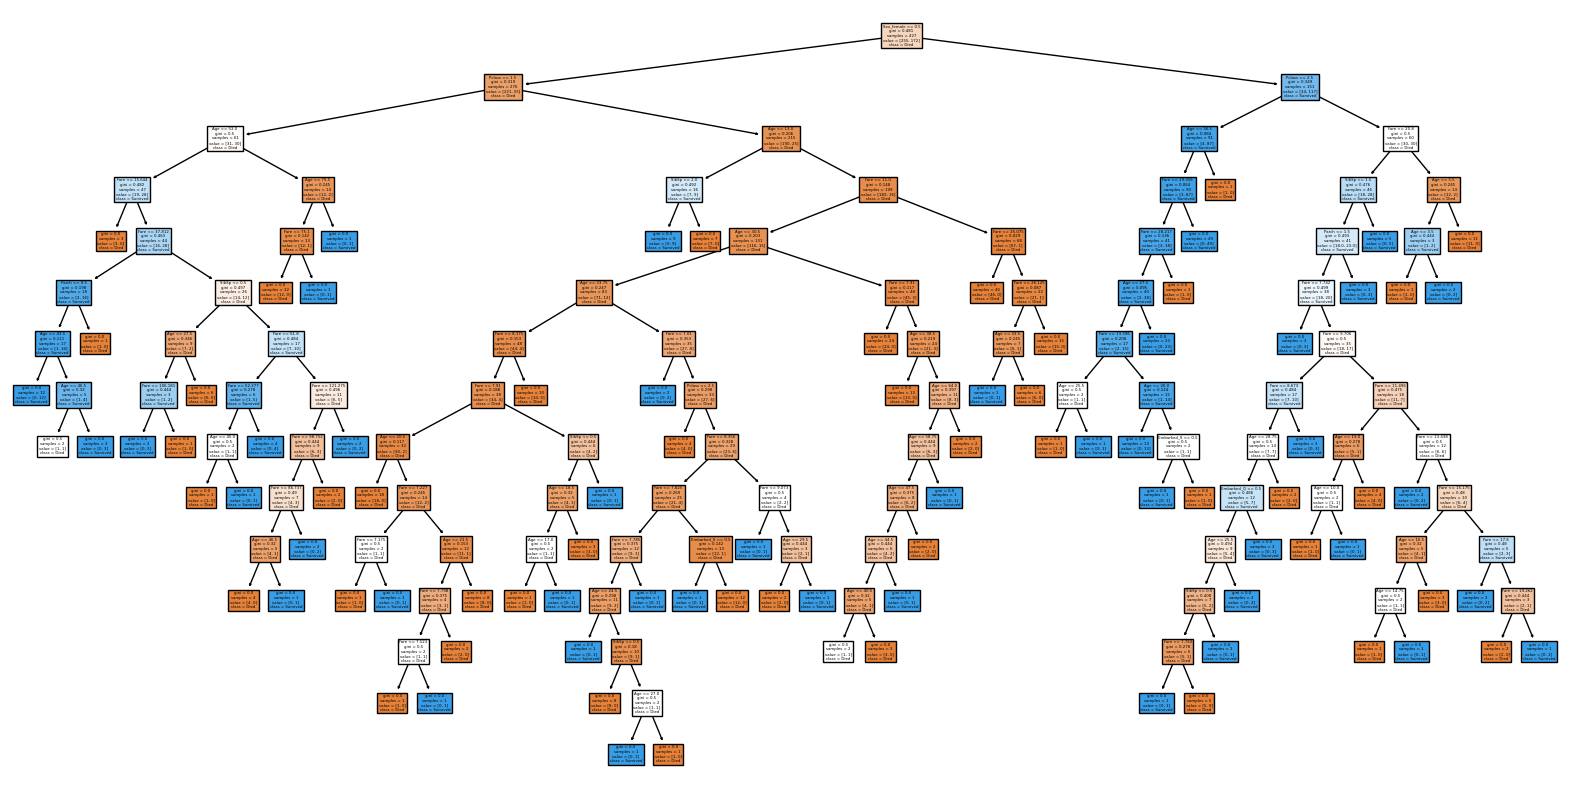

In [22]:
# Train a decision tree 
clf = DecisionTreeClassifier(max_depth=None, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()


## Compute the Model’s Accuracy on the Development Set

In [24]:

# Predict and compute accuracy
y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"Development Set Accuracy: {dev_accuracy:.2f}")

Development Set Accuracy: 0.71


#### Try building your model with different values of max_depth (2–10). At each step, create a plot of your tree and store the accuracies on both the training and development data.

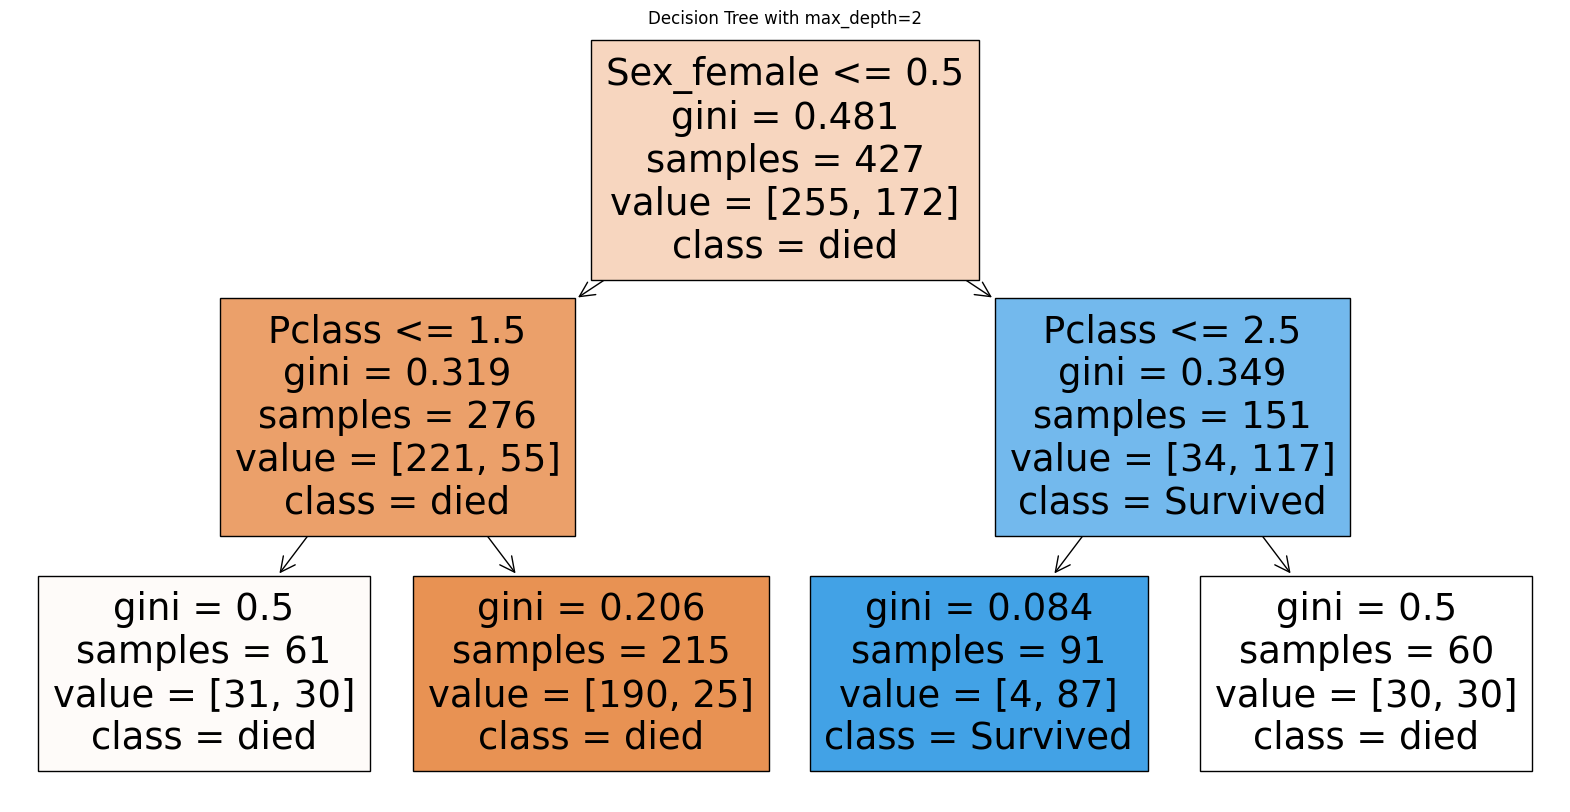

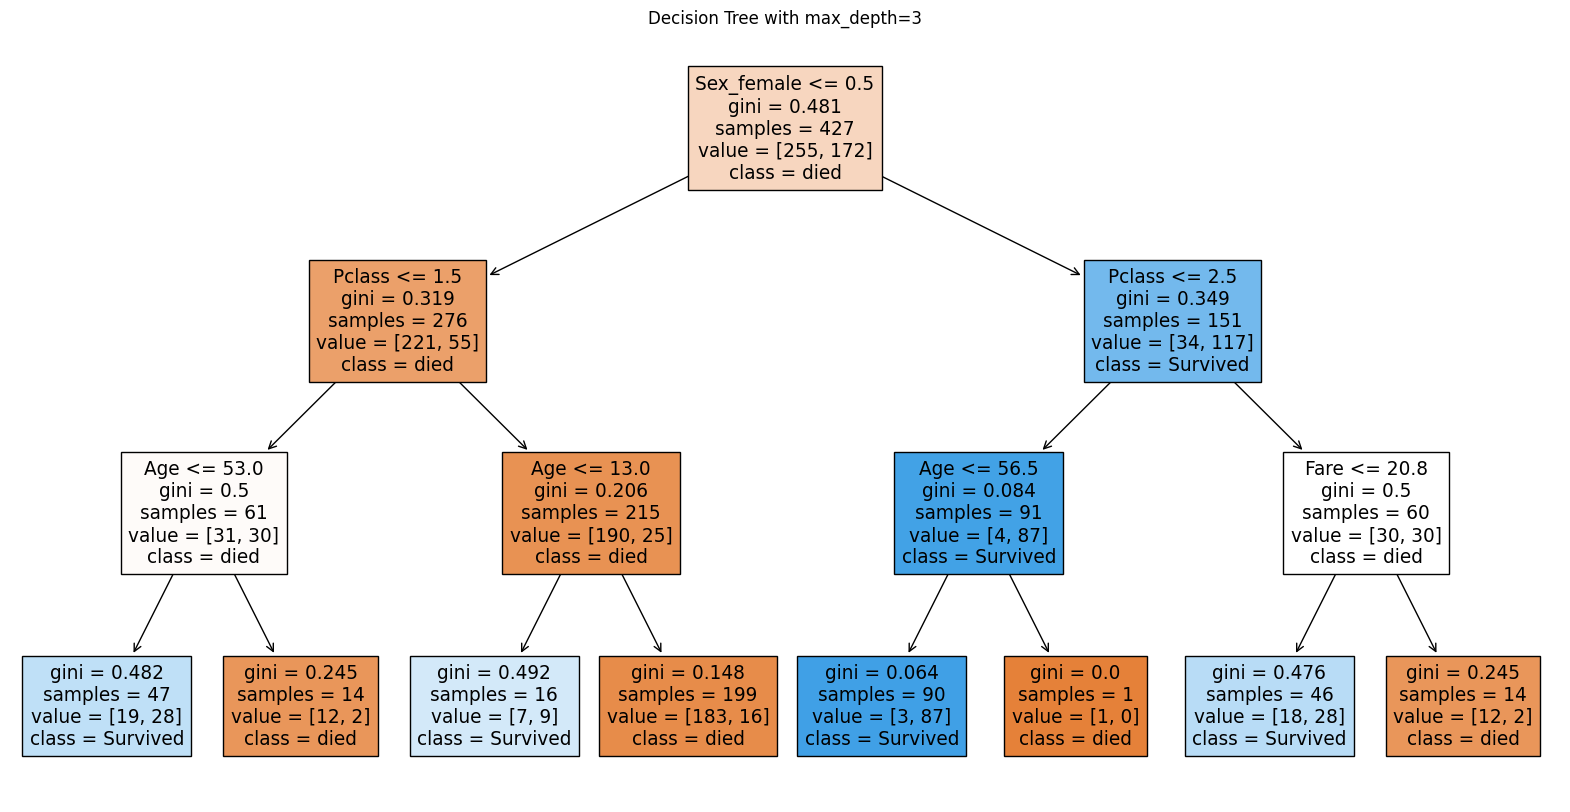

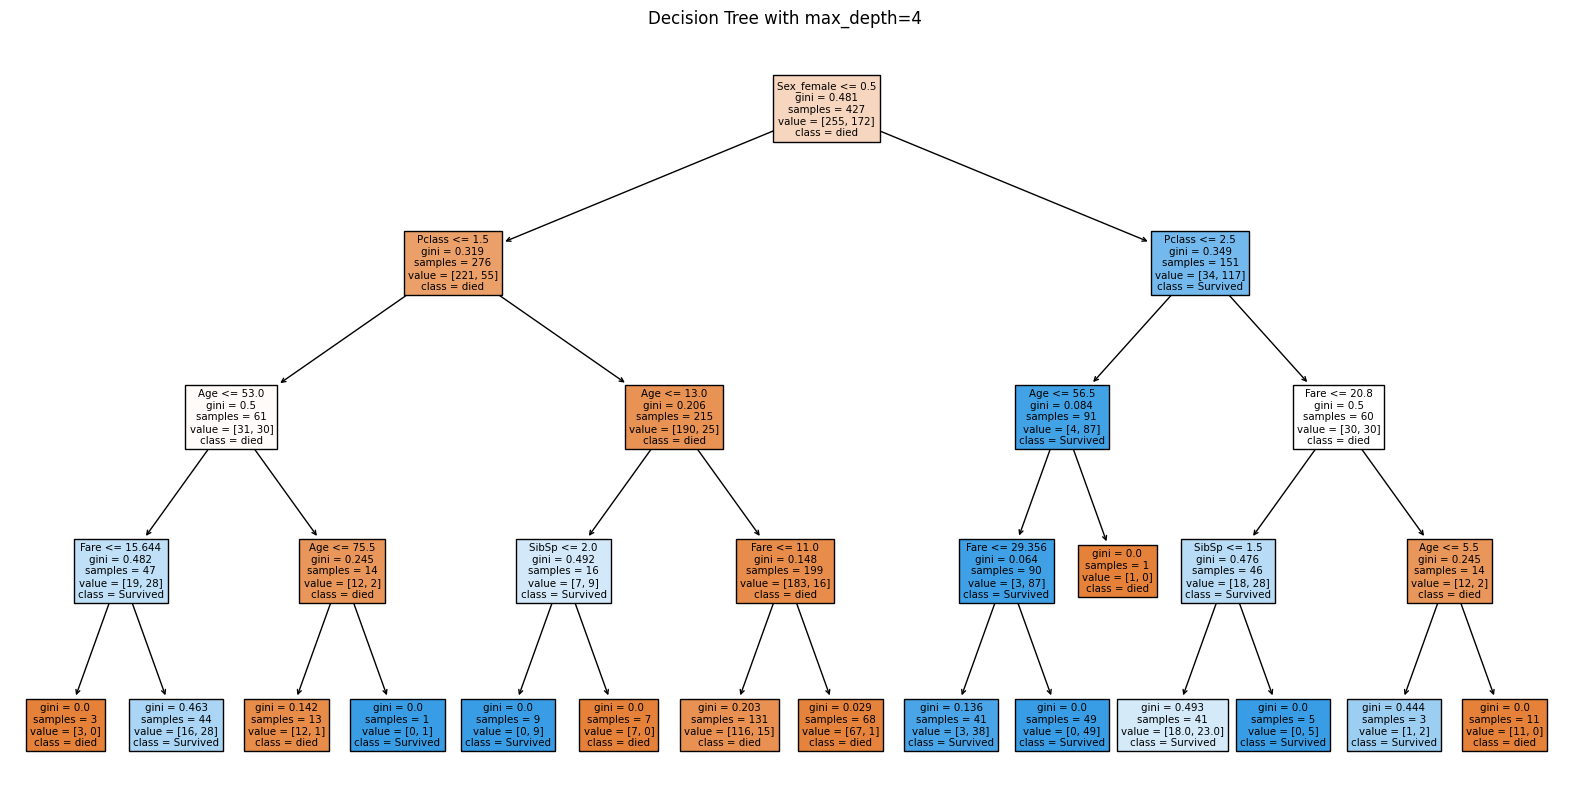

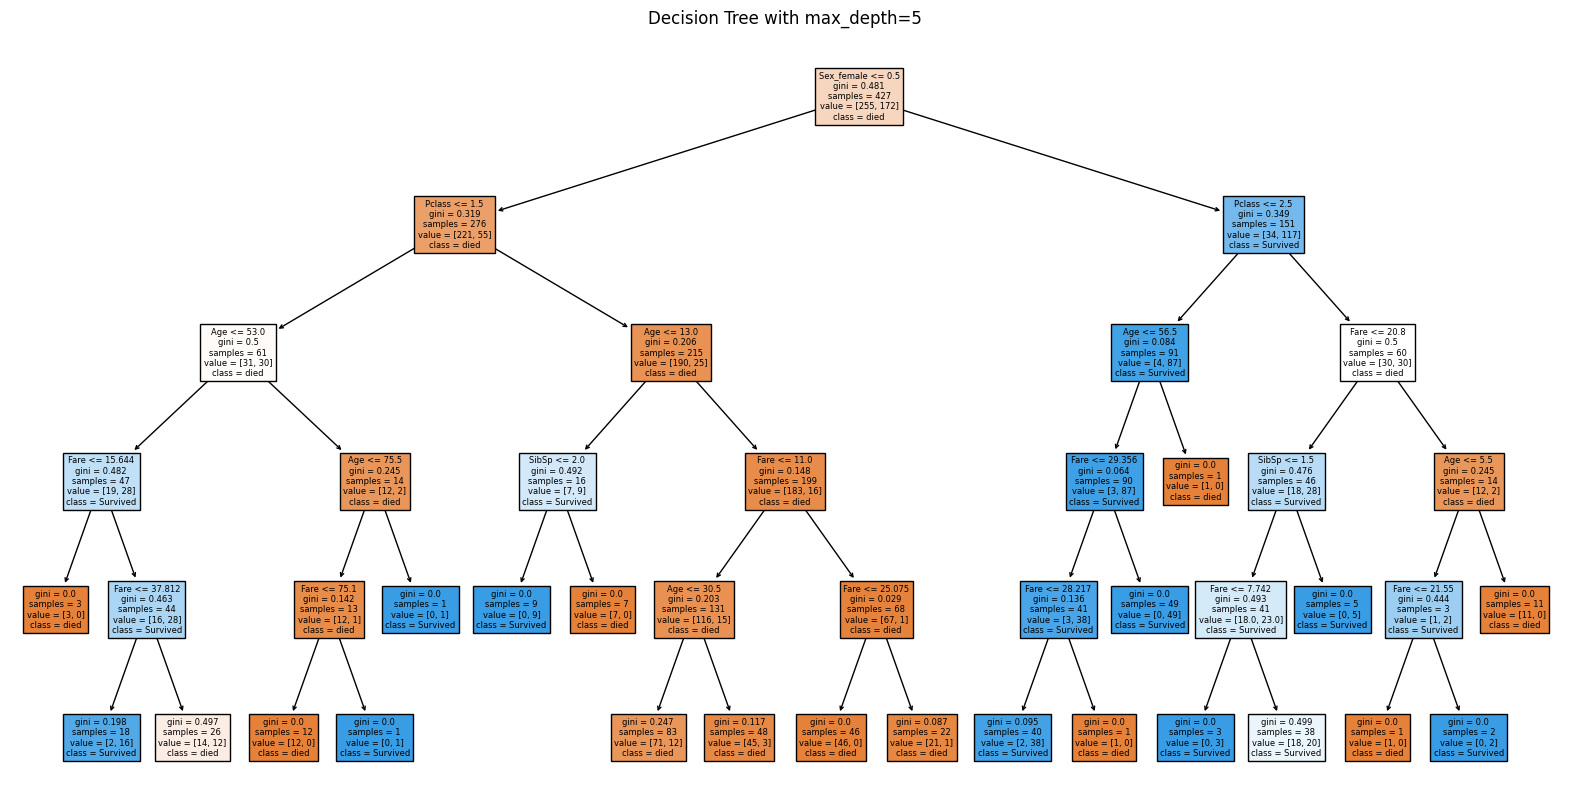

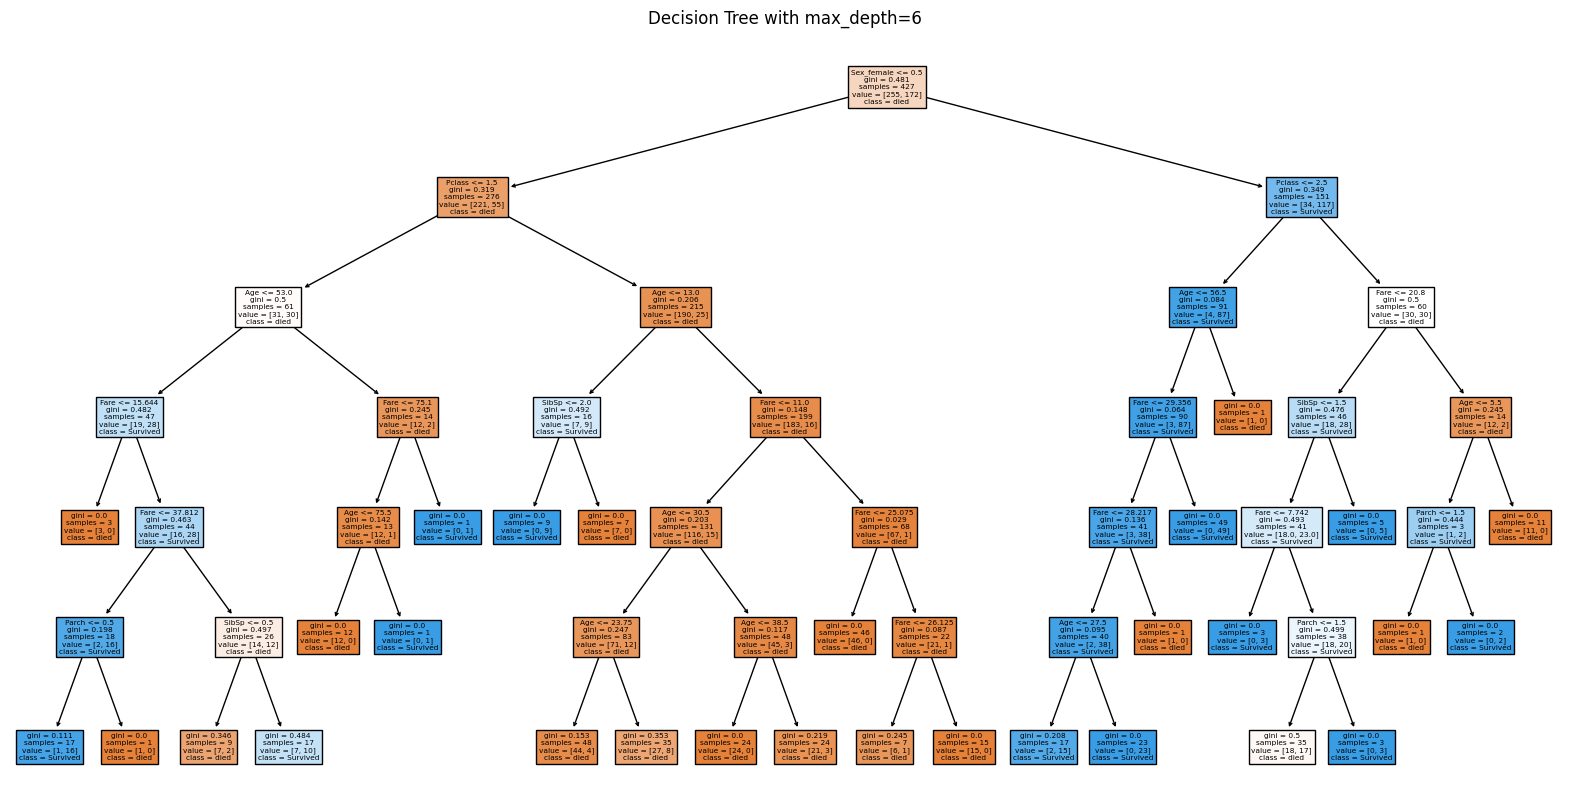

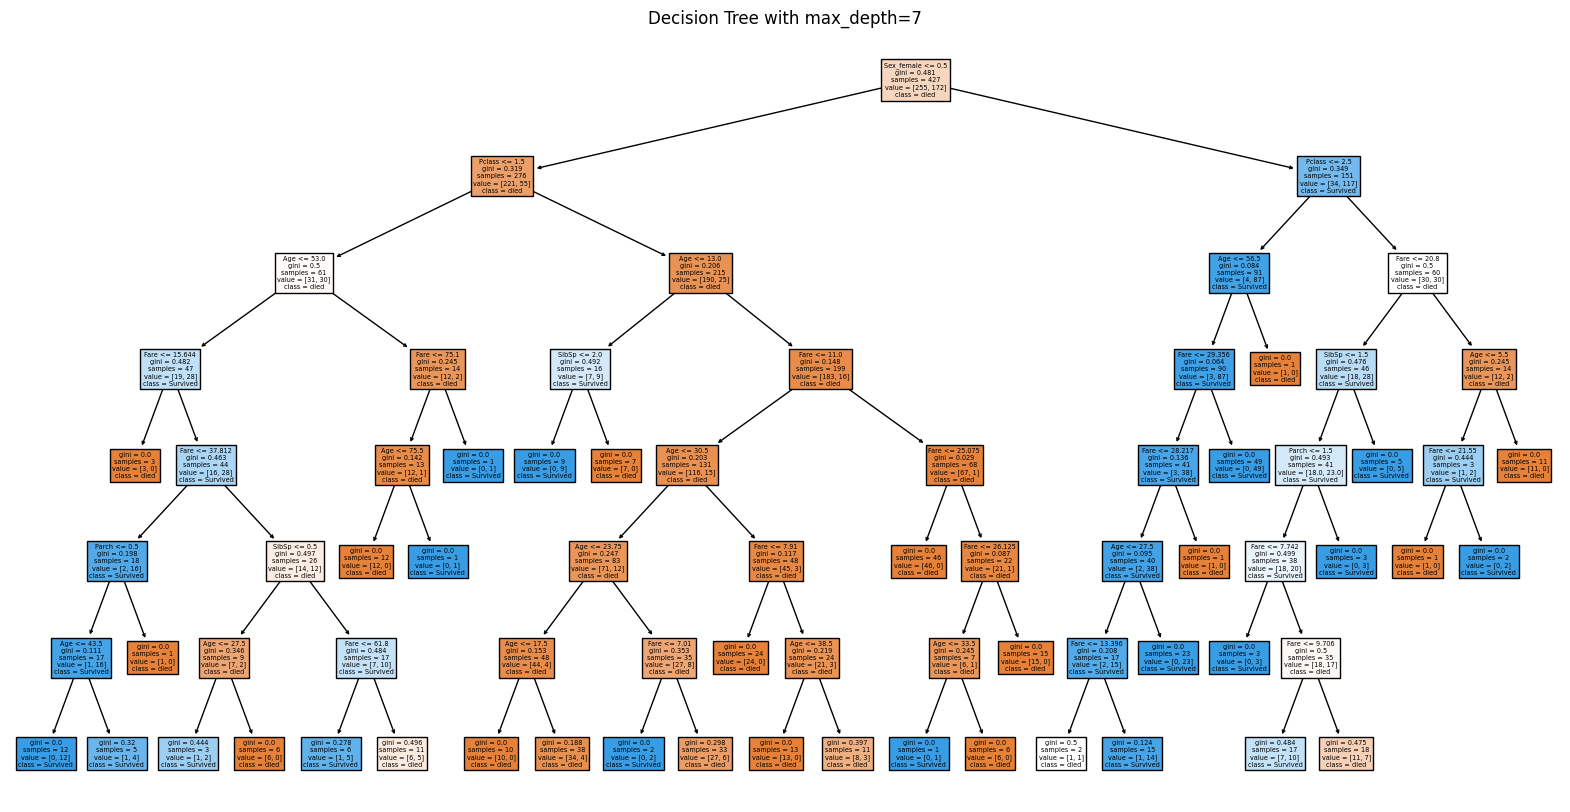

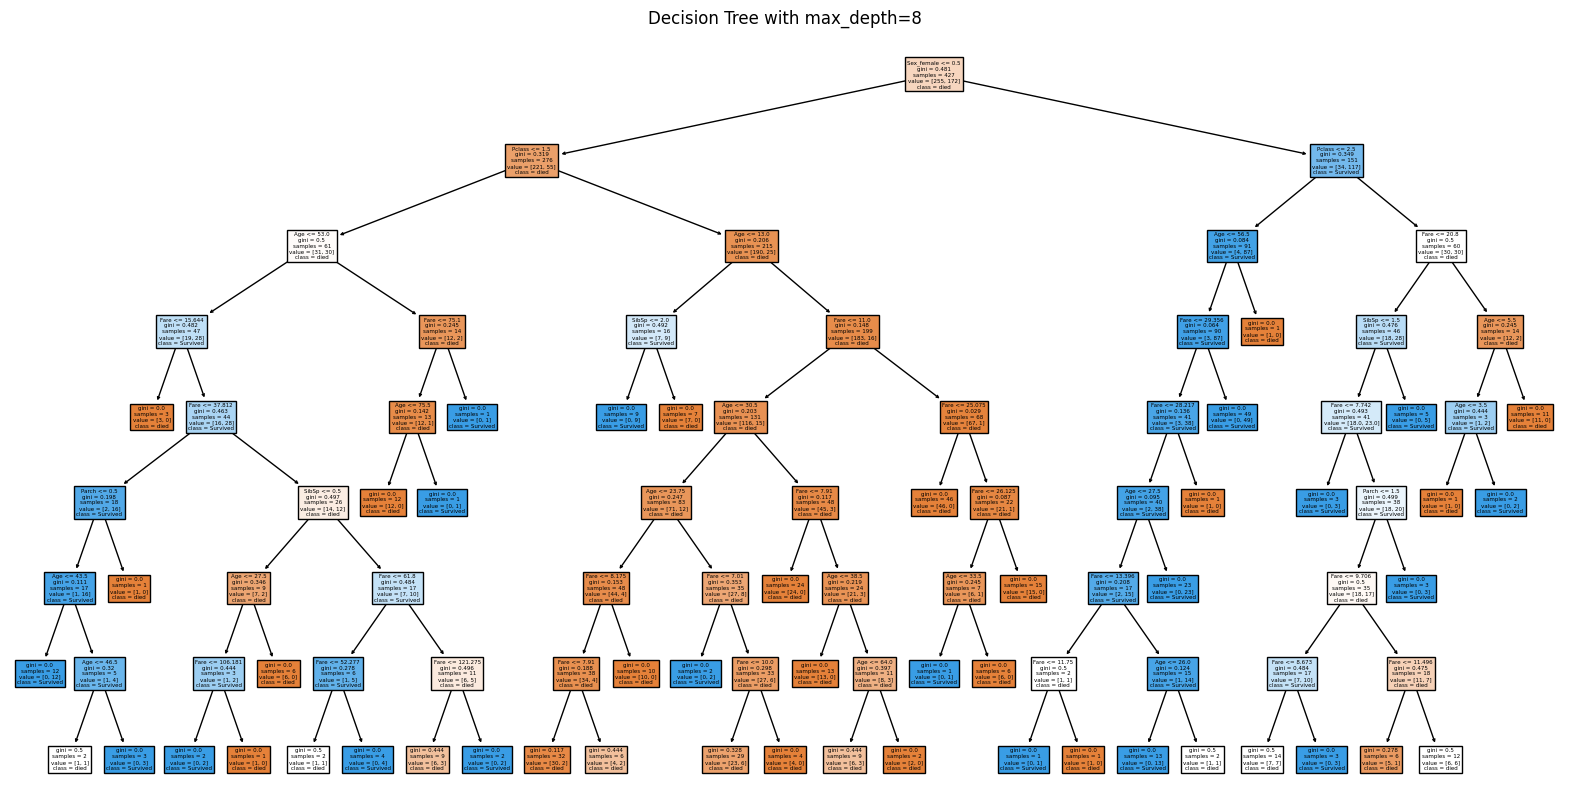

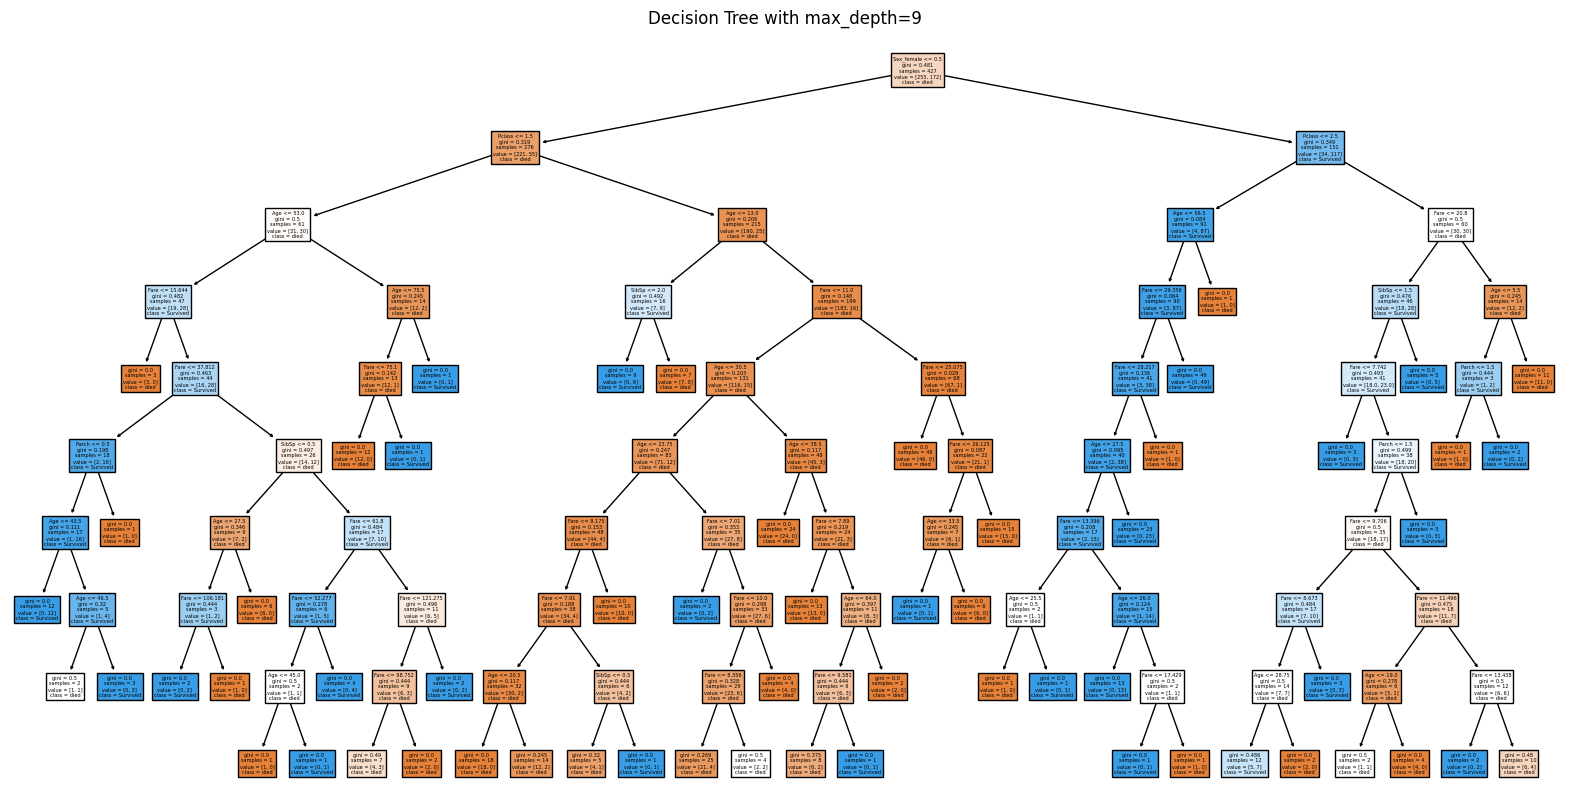

In [25]:
train_accuracies = []
dev_accuracies = []
max_depth_values = range(2, 10)

for max_depth in max_depth_values:
   clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
   clf.fit(X_train, y_train)

# Training data accuracy
   y_train_pred = clf.predict(X_train)
   train_accuracy = accuracy_score(y_train, y_train_pred)
   train_accuracies.append(train_accuracy)

    # Development Data Accuracy
   y_dev_pred = clf.predict(X_dev)
   dev_accuracy = accuracy_score(y_dev, y_dev_pred)
   dev_accuracies.append(dev_accuracy)

    # Plotting the decision tree
   plt.figure(figsize=(20,10))
   plot_tree(clf, feature_names=X.columns, class_names=['died', 'Survived'], filled=True)
   plt.title(f"Decision Tree with max_depth={max_depth}")
   plt.show



## Plot a line of the training accuracies and another for the development accuracies in the same graph. Write down what shape the lines have and what this shape means.
### Report the accuracy of your final model on the test data.

Text(0.5, 1.0, 'Training and Development Accuracies vs. Max Depth')

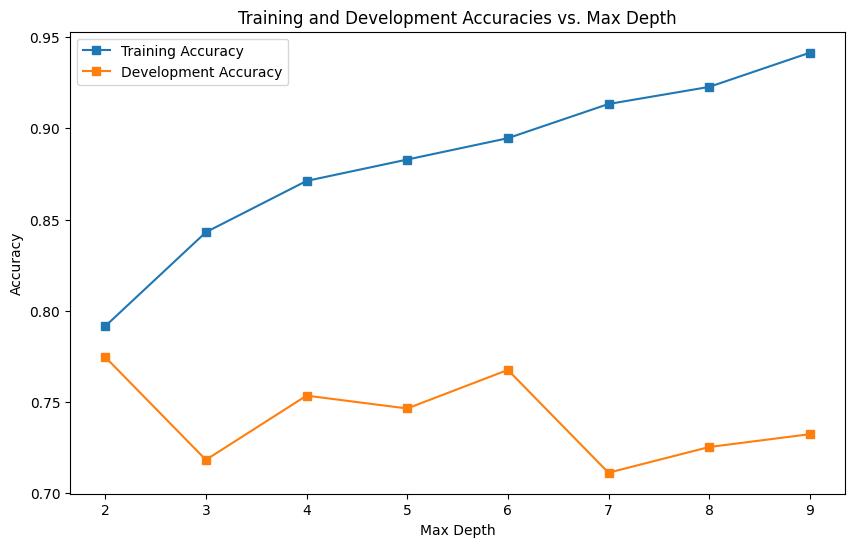

In [26]:
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, train_accuracies, label="Training Accuracy", marker="s")
plt.plot(max_depth_values, dev_accuracies, label="Development Accuracy", marker="s")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Development Accuracies vs. Max Depth")

### ANALYSIS OF THE ACCURACY PLOT ABOVE

The shape of the Training Accuracy line shows that it increases as the max_depth increases. This is because the model becomes more complex and can better fit the training data.

The Development Accuracy initially increased but eventually decreased as the model starts to overfith the training data.


## Report the accuracy of the final model on the test data.

In [27]:
# from the trees ploted, the best max_depth is 4
best_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
best_clf.fit(X_train, y_train)

# Test set accuracy
y_test_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {test_accuracy:.2f}')


Test Set Accuracy: 0.73


# RANDOM FOREST SECTION

### Create a bagged, random forest, and boosted tree for the Titanic data set

## Train Bagged Trees

In [28]:

# Create bagged tree model
bagged_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagged_clf.fit(X_train, y_train)

# Evaluate the model
y_dev_pred = bagged_clf.predict(X_dev)
bagged_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"Bagged Development Set Accuracy: {bagged_accuracy:.2f}")



Bagged Development Set Accuracy: 0.75


## Train Random Forests

In [29]:

# create random forest model
rforest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rforest_clf.fit(X_train, y_train)

# Evaluate model
y_dev_pred = rforest_clf.predict(X_dev)
rforest_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"Random Forest Development Set Accuracy: {rforest_accuracy:.2f}")

# Determine features importances
importances = rforest_clf.feature_importances_
features = X.columns
features_importances = pd.Series(importances, index=features).sort_values
print("Feature importances:\n", features_importances)


Random Forest Development Set Accuracy: 0.76
Feature importances:
 <bound method Series.sort_values of Pclass        0.116758
Age           0.254173
Sex_female    0.148297
Sex_male      0.139796
SibSp         0.048169
Parch         0.031929
Fare          0.234062
Embarked_C    0.011575
Embarked_Q    0.002675
Embarked_S    0.012566
dtype: float64>


## Training Boosted Trees

In [30]:

# Training boosted tree model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate the model
y_dev_pred = gb_clf.predict(X_dev)
gb_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"Gradient Boosting Development Set Accuracy: {gb_accuracy:.2f}")

Gradient Boosting Development Set Accuracy: 0.78


## Tune Random Forest

In [32]:
best_rf_accuracy = 0
best_n_estimators = 0
best_max_depth = 0

for n_estimators in [50, 100, 150]:
    for max_depth in [5, 10, 15]:
        rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_clf.fit(X_train, y_train)
        
        y_dev_pred = rf_clf.predict(X_dev)
        dev_accuracy = accuracy_score(y_dev, y_dev_pred)
        
        if dev_accuracy > best_rf_accuracy:
            best_rf_accuracy = dev_accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print(f'Best Random Forest Development Set Accuracy: {best_rf_accuracy:.2f}')
print(f'Best n_estimators: {best_n_estimators}, Best max_depth: {best_max_depth}')


Best Random Forest Development Set Accuracy: 0.80
Best n_estimators: 100, Best max_depth: 5


## Evaluate Final Model on test Data

In [34]:
# Train the best random forest model
final_rf_clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
final_rf_clf.fit(X_train, y_train)

# Test set accuracy
y_test_pred = final_rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy of Best Random Forest Model: {test_accuracy:.2f}')


Test Set Accuracy of Best Random Forest Model: 0.78
